In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz, plot_cargas

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado
Considere la información del proyecto cuya información aparece en la tabla adjunta:

In [3]:
periodo_a_probabilidad = 7
periodo_b_probabilidad = 9
duracion_objetivo = 6
limite_maximo_recursos = [8]*4 + [16]
pregunta_1 = f"1. ¿Cuál es la probabilidad de terminar el proyecto entre {periodo_a_probabilidad} y {periodo_b_probabilidad} periodos?  "
pregunta_2 = f"2. Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a {duracion_objetivo} periodos.  "
pregunta_3 = f"3. Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de {limite_maximo_recursos[0]} recursos por periodo durante los primeros cuatro periodos, y de {limite_maximo_recursos[-1]} recursos por periodo en los siguientes periodos "
pregunta_4 =  "4. Calcule el valor del CPI y del SPI para el punto de control de 8 periodos.  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))

1. ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 periodos?  

2. Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos.  

3. Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos, y de 16 recursos por periodo en los siguientes periodos 

4. Calcule el valor del CPI y del SPI para el punto de control de 8 periodos.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, desviación, coste_planificado, coste_real, duracion_real, realizado, cur, recursos
     ('A',      '---  ',       2,         1,              0.2,         60,              80,          2,           100,   80,    4 ),
     ('B',      'A    ',       2,         1,              0.3,         70,              60,          2,            80,   10,    2 ),
     ('C',      'B    ',       3,         1,              0.4,         50,               0,          0,             0,   40,    1 ),
     ('D',      '---  ',       4,         3,              0.5,         40,              50,          5,           100,   20,    4 ),
     ('E',      'A    ',       1,         1,              0.1,         30,              30,          3,           100,   30,    3 ),
     ('F',      'D,E  ',       2,         1,              0.3,         10,              10,          3,            80,   40,    5 ),
     ('G',      '---  ',       1,         1,              0.1,         40,              50,          3,           100,   20,    4 ),
     ('H',      'G    ',       4,         2,              0.5,        110,             140,          4,            90,   50,    2 ),
     ('I',      'D    ',       1,         1,              0.1,         90,              70,          1,            50,   60,    3 ),
     ('J',      'H,I,K',       2,         1,              0.4,         50,               0,          0,             0,   70,    1 ),
     ('K',      'D,G  ',       2,         1,              0.2,         40,              30,          2,            60,   90,    2 ),
     ('L',      'H,K  ',       2,         1,              0.2,         30,               0,          0,             0,   10,    3 ),
] ,columns=['actividad', 'precedentes', 'duracion', 'duracion_tope', 'desviacion', 'coste_planificado', 'coste_real',
            'duracion_real', 'realizado', 'cur', 'recursos']).set_index('actividad')
datos_enunciado

,precedentes,duracion,duracion_tope,desviacion,coste_planificado,coste_real,duracion_real,realizado,cur,recursos
actividad,,,,,,,,,,
A,---,2,1,0.2,60,80,2,100,80,4
B,A,2,1,0.3,70,60,2,80,10,2
C,B,3,1,0.4,50,0,0,0,40,1
D,---,4,3,0.5,40,50,5,100,20,4
E,A,1,1,0.1,30,30,3,100,30,3
F,"D,E",2,1,0.3,10,10,3,80,40,5
G,---,1,1,0.1,40,50,3,100,20,4
H,G,4,2,0.5,110,140,4,90,50,2
I,D,1,1,0.1,90,70,1,50,60,3


# Solución
## Apartado 1

In [6]:
display(Markdown(pregunta_1))

1. ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 periodos?  

In [7]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='actividad', predecessor='precedentes')

### Cuadro de prelaciones

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [8]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L
activities,,,,,,,,,,,,
A,,,,,,,,,,,,
B,True,,,,,,,,,,,
C,,True,,,,,,,,,,
D,,,,,,,,,,,,
E,True,,,,,,,,,,,
F,,,,True,True,,,,,,,
G,,,,,,,,,,,,
H,,,,,,,True,,,,,
I,,,,True,,,,,,,,


### Grafo PERT con numeración de nodos

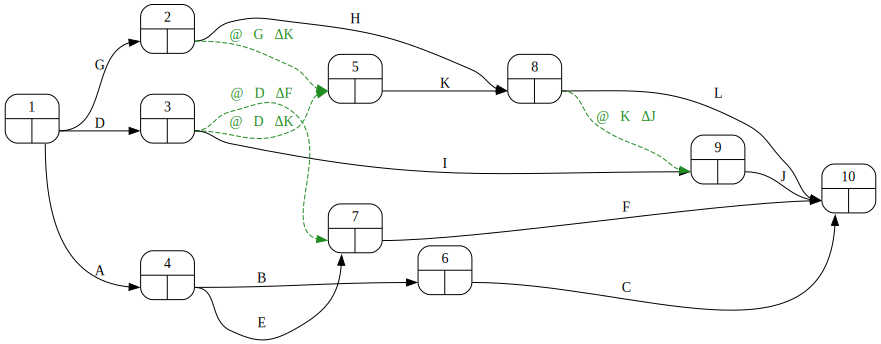

In [9]:
#| fig-cap: "Grafo Pert con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto = prelaciones.create_project()
proyecto.pert(nodesep=0.3, ranksep=1)

### Matriz de Zaderenko

In [10]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto["duracion"])

,1,2,3,4,5,6,7,8,9,10,early
1,,1.0,4.0,2.0,,,,,,,0.0
2,,,,,0.0,,,4.0,,,1.0
3,,,,,0.0,,0.0,,1.0,,4.0
4,,,,,,2.0,1.0,,,,2.0
5,,,,,,,,2.0,,,4.0
6,,,,,,,,,,3.0,4.0
7,,,,,,,,,,2.0,4.0
8,,,,,,,,,0.0,2.0,6.0
9,,,,,,,,,,2.0,6.0
10,,,,,,,,,,,8.0


Los tiempos tempranos y tardios han resultado ser:

In [11]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto["duracion"])
resultados_pert['nodes']

,early,late
1,0,0
2,1,2
3,4,4
4,2,3
5,4,4
6,4,5
7,4,6
8,6,6
9,6,6
10,8,8


### Duración media del proyecto

In [12]:
duracion_media_proyecto = int(proyecto.duration(durations=datos_proyecto['duracion']))
Markdown(f"La información del nodo final del proyecto nos informa de la duración media del proyecto: {duracion_media_proyecto} periodos")

La información del nodo final del proyecto nos informa de la duración media del proyecto: 8 periodos

### Holgura total de las actividades
A partir de los tiempos tempranos y tardíos, y de las duraciones de las actividades, podemos determinar la holgura total de las actividades y con ellas las rutas del camino crítico.

In [13]:
#| tbl-cap: "Valor de la holgura total de las actividades"
#| label: tbl-htotal
resultados_pert['activities']

,H_total
@∇D⤑ΔF,2
@∇D⤑ΔK,0
@∇G⤑ΔK,3
@∇K⤑ΔJ,0
A,1
B,1
C,1
D,0
E,3
F,2


### Camino crítico

El camino crítico consta de las siguientes rutas:

In [14]:
camino_critico = proyecto.critical_path(durations=datos_proyecto['duracion'])
for key, value in camino_critico.items():
    display(Markdown(f"{key}: \t " + ", ".join(value)))

Route_5: 	 D, J, K

Route_6: 	 D, K, L

### Calendario del proyecto
Se muestra a continuación el calendario del proyecto, con indicación de las fechas de inicio y fin más tempranas y tardías de cada actividad:

In [15]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duracion'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
actividad,,,,,,
A,0,1,2,3,1,2
B,2,3,4,5,1,2
C,4,5,7,8,1,3
D,0,0,4,4,0,4
E,2,5,3,6,3,1
F,4,6,6,8,2,2
G,0,1,1,2,1,1
H,1,2,5,6,1,4
I,4,5,5,6,1,1


### Grafo PERT con indicación de tiempos y rutas del camino crítico de acuerdo a la planificación inicial
A continuación se muestra el grafo Pert del proyecto, con indicación de las actividades críticas:

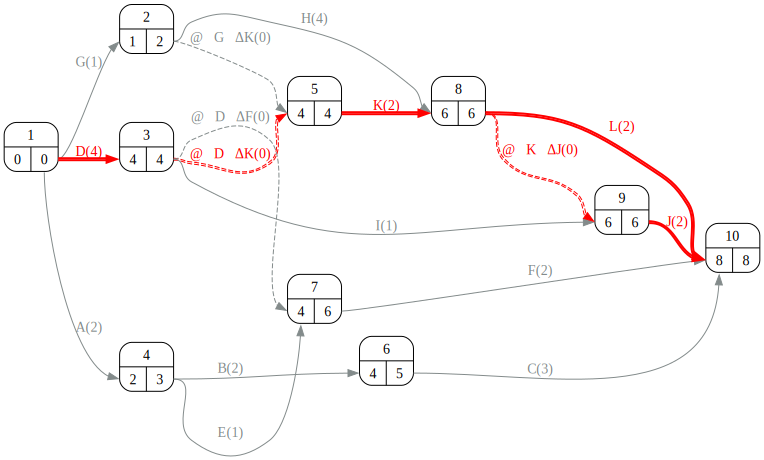

In [16]:
#| fig-cap: "Grafo Pert con indicación del camino crítico"
#| label: fig-pertrutasCriticas
proyecto.pert(durations=datos_proyecto['duracion'])

### Caracterización de la duración del proyecto mediante una distribución Normal
A fin de calcular la probabilidad pedida, es necesario caracterizar la distribución Normal de la duración del proyecto. Esto consiste en determinar los valores de sus parámetros: media y desviación típica de la duración del proyecto.

In [17]:
duracion_media_proyecto = int(proyecto.duration(datos_proyecto['duracion']))

Markdown(f"La duración media del proyecto ya la tenemos calculada: {duracion_media_proyecto} periodos")

La duración media del proyecto ya la tenemos calculada: 8 periodos

Para determinar la desviación típica debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor.

In [18]:
datos_proyecto['varianza'] = datos_proyecto.eval('desviacion ** 2')
desviacion_proyecto, varianza_rutas = proyecto.standard_deviation(durations=datos_proyecto['duracion'],
                                                   variances=datos_proyecto['varianza'])

In [19]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas
varianza_rutas

,Activities,Variance
Route_5,"D, J, K",0.45
Route_6,"D, K, L",0.33


In [20]:
Markdown(f"El proyecto sigue una distribución normal con media {duracion_media_proyecto} periodos y desviación típica {round(desviacion_proyecto, 2)}.")

El proyecto sigue una distribución normal con media 8 periodos y desviación típica 0.67.

#### Probabilidad de terminar entre 7 y 9 periodos

In [21]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_b = round(norm.cdf(periodo_b_probabilidad, loc=duracion_media_proyecto, scale=desviacion_proyecto), 2)
probabilidad_de_terminar_antes_de_a = round(norm.cdf(periodo_a_probabilidad, loc=duracion_media_proyecto, scale=desviacion_proyecto), 2)

probabilidad_de_terminar_entre_a_y_b = probabilidad_de_terminar_antes_de_b - probabilidad_de_terminar_antes_de_a

In [22]:
Markdown(f"""Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos {periodo_a_probabilidad} y {periodo_b_probabilidad}.  
- La probabilidad de terminar antes de {periodo_a_probabilidad} periodos es  {probabilidad_de_terminar_antes_de_a}  
- La probabilidad de terminar antes de {periodo_b_probabilidad} periodos es {probabilidad_de_terminar_antes_de_b}  

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: {int(probabilidad_de_terminar_entre_a_y_b*100)} por ciento.
""")

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos 7 y 9.  
- La probabilidad de terminar antes de 7 periodos es  0.07  
- La probabilidad de terminar antes de 9 periodos es 0.93  

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: 86 por ciento.


## Apartado 2

In [23]:
display(Markdown(pregunta_2))

2. Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos.  

In [24]:
ackoff, best_option, duration, available =proyecto.ackoff(durations=datos_proyecto['duracion'],
                                                          min_durations=datos_proyecto['duracion_tope'],
                                                          costs=datos_proyecto['cur'],
                                                          reduction=duracion_media_proyecto - duracion_objetivo)

In [25]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,0,1,2
Route_1,80.0,10.0,40.0,,,,,,,,,,7.0,7.0,6.0
Route_2,80.0,,,,30.0,40.0,,,,,,,5.0,5.0,5.0
Route_3,,,,20.0,,40.0,,,,,,,6.0,5.0,5.0
Route_4,,,,20.0,,,,,60.0,70.0,,,7.0,6.0,5.0
Route_5,,,,20.0,,,,,,70.0,90.0,,8.0,7.0,6.0
Route_6,,,,20.0,,,,,,,90.0,10.0,8.0,7.0,6.0
Route_7,,,,,,,20.0,50.0,,70.0,,,7.0,7.0,6.0
Route_8,,,,,,,20.0,50.0,,,,10.0,7.0,7.0,6.0
Route_9,,,,,,,20.0,,,70.0,90.0,,5.0,5.0,4.0
Route_10,,,,,,,20.0,,,,90.0,10.0,5.0,5.0,4.0


Las actividades a recortar en cada iteración son:

In [26]:
for iteracion, actividades in best_option.items():
    display(Markdown(f"- Iteración {iteracion}: " + ", ".join(actividades) + "<br>"))

- Iteración 0: D<br>

- Iteración 1: L, B, J<br>

## Apartado 3

In [27]:
display(Markdown(pregunta_3))

3. Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos, y de 16 recursos por periodo en los siguientes periodos 

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

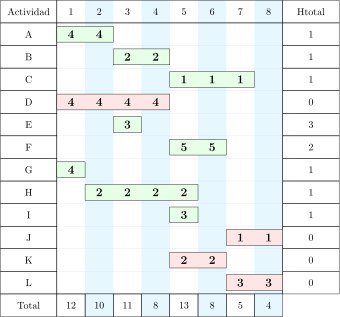

In [28]:
#| fig-cap: "Distribución inicial del consumo de recursos"
#| label: fig-recursosInicial
proyecto_asignacion = proyecto.copy()
gantt_recursos, dibujo = proyecto_asignacion.gantt(datos_proyecto,
                                                  'duracion',
                                                  'recursos',
                                                  total='fila',
                                                  holguras = True,
                                                  tikz=True)
pinta_tikz(dibujo)

La fila "Total" obtenida, que podemos representar gráficamente en la siguiente figura, proporciona la información del consumo previsto de recursos a lo largo del tiempo.

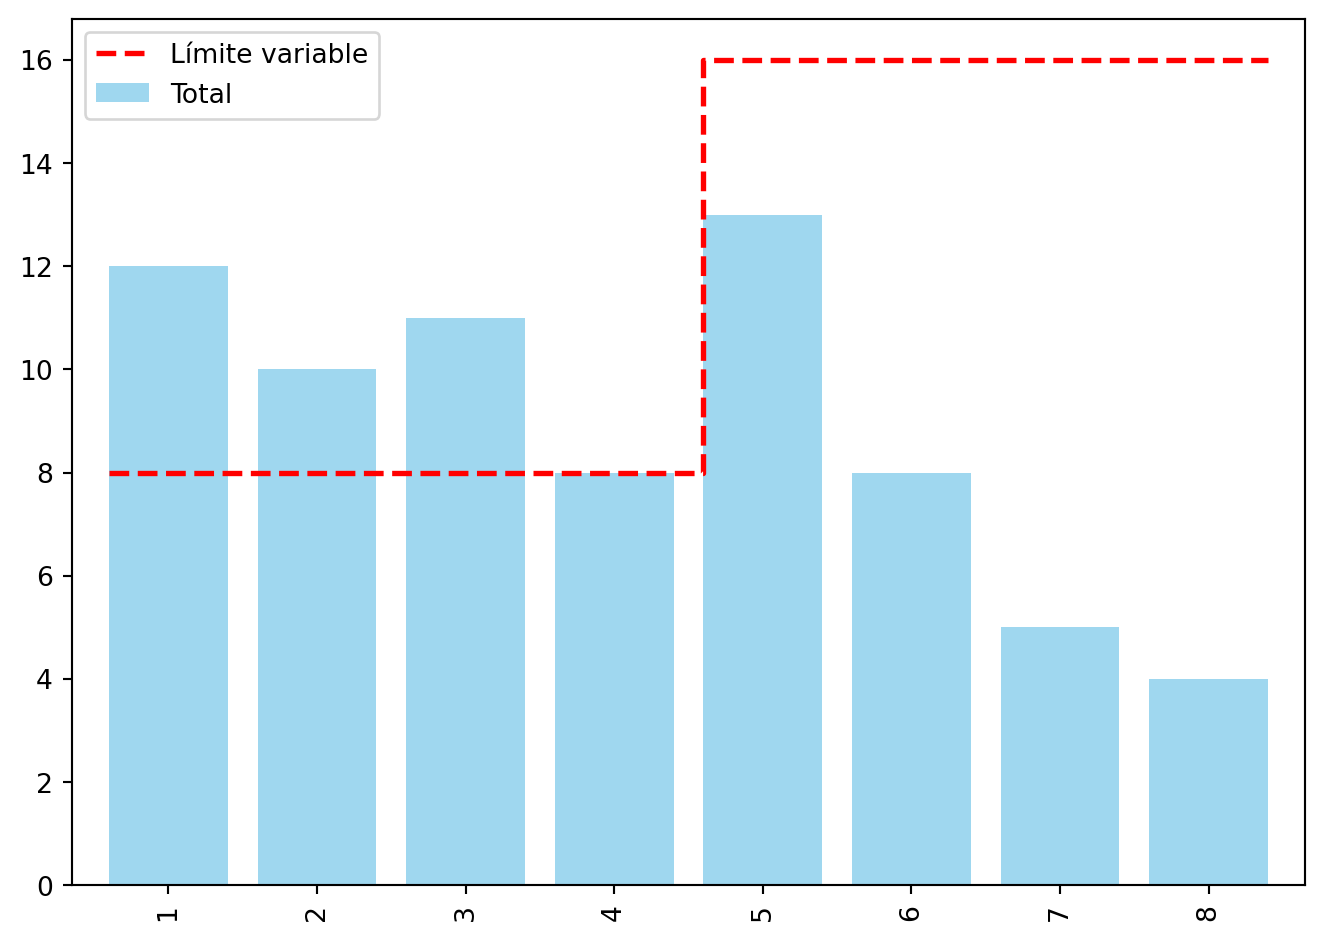

In [29]:
#| fig-cap: "Diagrama de cargas antes de aplicar el algoritmo de asignación"
#| label: fig-preAsignacionBarras
plot_cargas(gantt_recursos, limite_maximo_recursos)

La demanda de recursos actual infringe el límite impuesto. Es necesario aplicar el algoritmo de asignación.

### Algoritmo de asignación

In [30]:
duracion_y_recursos = datos_proyecto[['duracion', 'recursos']]
my_data, gantt_df, dibujo  = proyecto_asignacion.asignar(
                                    data=duracion_y_recursos,
                                    duration_label='duracion',
                                    resource_label='recursos',
                                    maximo=limite_maximo_recursos,
                                    report=False
                                    )

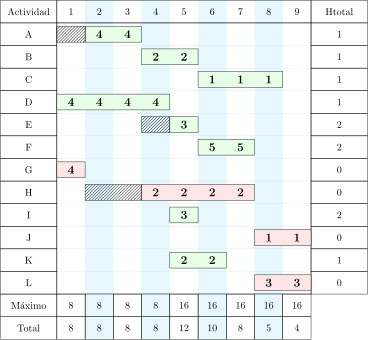

In [31]:
#| fig-cap: "Diagrama de Gantt del proyecto tras la asignación"
#| label: fig-ganttPostAsignación
pinta_tikz(dibujo)

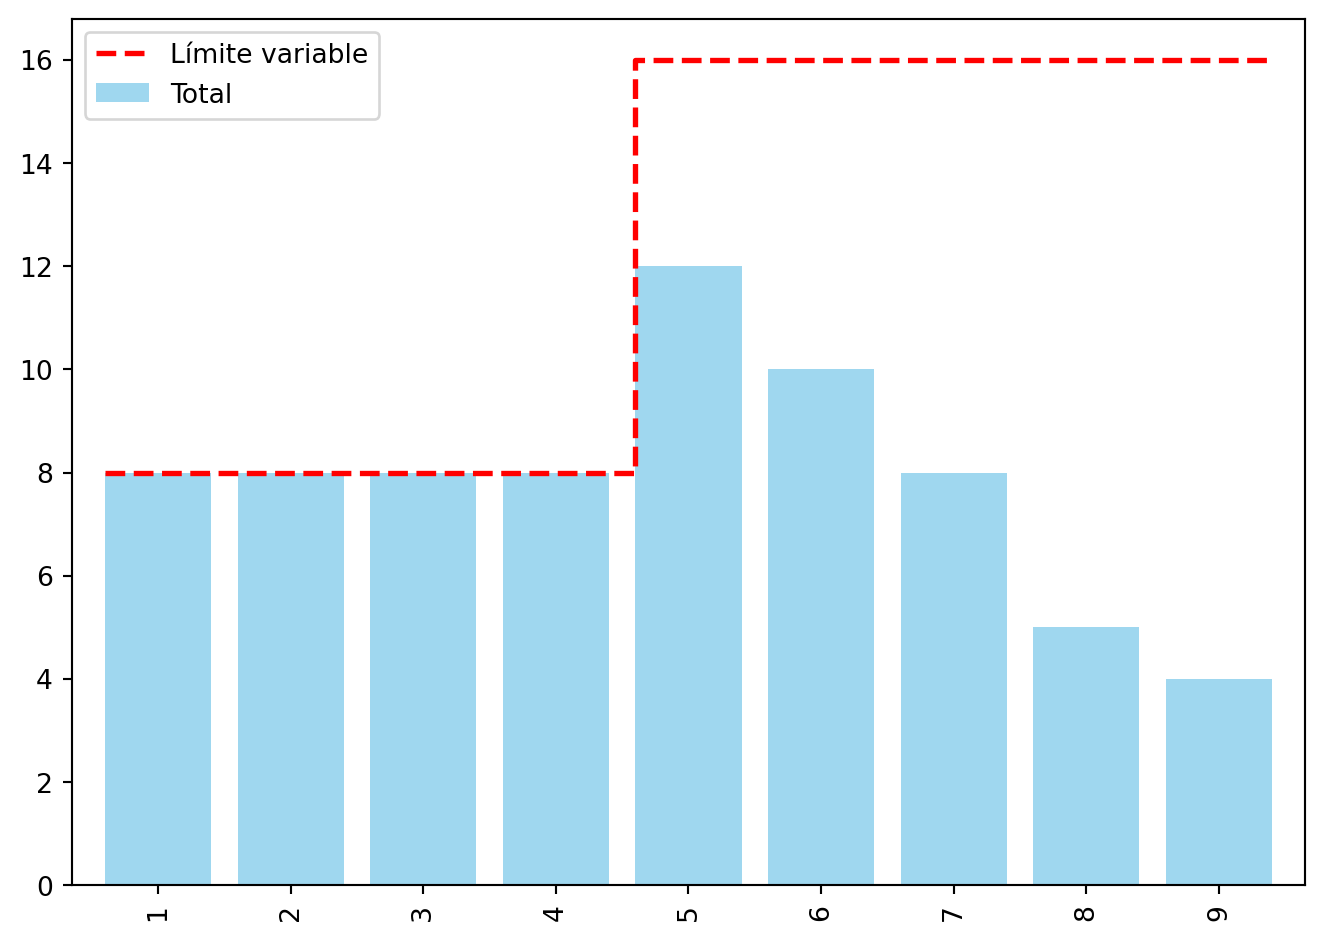

In [32]:
#| fig-cap: "Diagrama de cargas tras aplicar el algoritmo de asignación"
#| label: fig-postAsignacionBarras
plot_cargas(gantt_df, limite_maximo_recursos)

## Apartado 4

In [33]:
display(Markdown(pregunta_4))

4. Calcule el valor del CPI y del SPI para el punto de control de 8 periodos.  

In [34]:
PV = float(datos_proyecto['coste_planificado'].sum())
EV = float(datos_proyecto.eval('coste_planificado * realizado / 100').sum())
AC = float(datos_proyecto['coste_real'].sum())
CPI = EV/AC
SPI=EV/PV

- Para obtener PV podemos sumar directamente los valores de la columna `coste_planificado`.
- Para obtener EV, podemos multiplicar la columna `coste_planificado` por el valor de la columna `realizado`, divbidir entre 100 y sumar todos los valores.
- Para obtener el valor de AC, podemos sumar directamente los valores de la columna `coste real`.
- Para calcular CPI utilizamos la definición $CPI=EV/AC$
- Para calcular SPI utilizamos la definición $SPI=EV/PV$

Con estas consideraciones, los valores resultantes son:

In [35]:
Markdown(f"""
PV = {PV}  
AC = {AC}  
EV = {EV}  
CPI = {round(CPI, 2)}  
SPI = {round(SPI, 2)}""")


PV = 620.0  
AC = 520.0  
EV = 402.0  
CPI = 0.77  
SPI = 0.65